# Module 5: Capstone Project

# The Dataset:   Brazilian Aeronautics Accidents

### The data for this project is from kaggle:
https://www.kaggle.com/paulovasconcellos/aeronautics-accidents-in-brazil#aircrafts.csv

## Importing Libraries

In [46]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import datetime

import warnings
warnings.filterwarnings(action='ignore')

In [47]:

from subprocess import check_output
print(check_output(['ls', 'aircrafts.csv']).decode('utf8'))

aircrafts.csv



# Part I:  Features Engineering

## Initial data investigating  

In [48]:
# assign the data to a file called 'data'
# print out the shape (#rows, #columns), and the first 5 rows of the data

data = pd.read_csv('aircrafts.csv', na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1')
print ('shape of the data -', data.shape)

data.head()

shape of the data - (2043, 23)


,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,...,BRAZIL,TPX,AEROTAXI,NaN,NaN,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,...,BRAZIL,TPR,REGULAR,NaN,NaN,ASCENSION,REGULAR,NONE,NaN,2016-07-30


In [49]:
data.tail()

,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
2038,2038,36454,53473,PUXXX4,3992,ULTRALIGHT,NaN,NaN,UNKNOWN,NaN,...,BRAZIL,TPP,PRIVATE,SDMH,SDMH,CRUISE,PRIVATE,SUBSTANTIAL,1.0,2016-07-30
2039,2039,36455,53556,PUXXX5,3992,ULTRALIGHT,NaN,NaN,UNKNOWN,NaN,...,BRAZIL,PET,EXPERIMENTAL,SDMH,SDMH,CRUISE,PRIVATE,DESTROYED,1.0,2016-07-30
2040,2040,38934,60649,ZPBIL,3992,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,1.0,...,NaN,EXT,UNKNOWN,SDEN,SBNF,TAKEOFF,PRIVATE,SUBSTANTIAL,NaN,2016-07-30
2041,2041,38941,60879,ZPTVU,3992,UNKNOWN,WZQ-OKECIE,PZL 106 KRUK,UNKNOWN,NaN,...,NaN,EXT,UNKNOWN,NaN,NaN,MANEUVER,AGRICULTURAL,DESTROYED,2.0,2016-07-30
2042,2042,39147,28437,DGOMM,3992,AIRPLANE,PIPER AIRCRAFT,PA34,PISTON,2.0,...,GERMAN,NaN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,DESTROYED,NaN,2016-07-30


In [50]:
print ('columns:', list(data.columns))

columns: ['Unnamed: 0', 'aircraft_id', 'occurrence_id', 'registration', 'operator_id', 'equipment', 'manufacturer', 'model', 'engine_type', 'engines_amount', 'takeoff_max_weight (Lbs)', 'seatings_amount', 'year_manufacture', 'registration_country', 'registration_category', 'registration_aviation', 'origin_flight', 'destination_flight', 'operation_phase', 'type_operation', 'damage_level', 'fatalities_amount', 'extraction_day']


### Drop columns that are not relevant to this project

In [51]:
data = data.drop(['Unnamed: 0','aircraft_id', 'occurrence_id', 'registration'], axis=1)
data = data.drop(['operator_id','origin_flight', 'destination_flight', 'extraction_day'], axis=1)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 15 columns):
equipment                   2042 non-null object
manufacturer                1933 non-null object
model                       2028 non-null object
engine_type                 2043 non-null object
engines_amount              2034 non-null float64
takeoff_max_weight (Lbs)    2043 non-null int64
seatings_amount             2025 non-null float64
year_manufacture            2039 non-null float64
registration_country        2031 non-null object
registration_category       2034 non-null object
registration_aviation       2043 non-null object
operation_phase             2042 non-null object
type_operation              2043 non-null object
damage_level                2043 non-null object
fatalities_amount           355 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 239.5+ KB


In [53]:
#  look at some statistical information on the numerical features
# we can see the maximum and minimum values for some of the features

data.describe()

,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,fatalities_amount
count,2034.000000,2043.000000,2025.000000,2039.000000,355.000000
mean,1.244346,11750.045032,8.928889,1902.494850,3.208451
std,0.483653,48511.565643,26.922299,402.024605,13.367108
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1860.000000,2.000000,1975.000000,1.000000
50%,1.000000,3600.000000,4.000000,1986.000000,2.000000
75%,2.000000,4750.000000,6.000000,1999.000000,2.000000
max,4.000000,630499.000000,301.000000,2015.000000,199.000000


## Check for missing data

In [54]:
data.isnull().sum()

equipment                      1
manufacturer                 110
model                         15
engine_type                    0
engines_amount                 9
takeoff_max_weight (Lbs)       0
seatings_amount               18
year_manufacture               4
registration_country          12
registration_category          9
registration_aviation          0
operation_phase                1
type_operation                 0
damage_level                   0
fatalities_amount           1688
dtype: int64

## Inspect the data for each of the features that contain missing values

In [55]:
# list the unique values of the equipment column and how many occurrances of each

print ('equipment:' , data['equipment'].unique())
data['equipment'].value_counts(dropna=False)

equipment: ['AIRPLANE' 'HELICOPTER' 'GLIDER' 'ULTRALIGHT' 'AMPHIBIOUS' 'UNKNOWN'
 'AIRSHIP' nan]


AIRPLANE      1603
HELICOPTER     264
ULTRALIGHT     151
GLIDER          11
AMPHIBIOUS       6
UNKNOWN          5
AIRSHIP          2
NaN              1
Name: equipment, dtype: int64

In [56]:
# replace the 1 nan value with 'Unknown'
data['equipment'] = data['equipment'].fillna('UKNOWN')

In [57]:

print ('manufacturer:' , data['manufacturer'].unique())

data['manufacturer'].value_counts(dropna=False)

manufacturer: ['NEIVA INDUSTRIA AERONAUTICA' 'BEECH AIRCRAFT' 'BOEING COMPANY'
 'CESSNA AIRCRAFT' 'PIPER AIRCRAFT' 'HELIBRAS' 'EMBRAER' 'XAVANTE'
 'AERO BOERO' 'INDÚSTRIA PARANAENSE DE ESTRUTURAS'
 'CIA AERONAUTICA PAULISTA' 'MAULE AIRCRAFT' 'BELL HELICOPTER' 'LEARJET'
 nan 'LAVIASA' 'NORTH AMERICAN' 'TWIN COMMANDER' 'ROBINSON HELICOPTER'
 'MITSUBISHI' 'AGUSTA' 'SIKORSKY AIRCRAFT' 'MOONEY AIRCRAFT'
 'AEROSPATIALE AND ALENIA' 'FABRICACAO PROPRIA' 'CHINCUL SACAIFI'
 'EUROCOPTER FRANCE' 'HUGHES HELICOPTER' 'AIRBUS INDUSTRIE'
 'EUROCOPTER DEUTSCHLAND' 'AIR TRACTOR' 'LET AIRCRAFT INDUSTRIES' 'FOKKER'
 'MCDONNELL DOUGLAS' 'AMERICAN CHAMPION' 'AEROMOT' 'RAYTHEON AIRCRAFT'
 'CIRRUS DESIGN' 'SCHWEIZER' 'CONSOLIDATED' 'HAWKER BEECHCRAFT' 'STEMME'
 'ANTONIO CESAR DA SILVA AMARAL' 'NILSON SULZBACH PERES' 'BRITTEN-NORMAN'
 'INPAER INDUSTRIA PAULISTA E AERONÁUTICA'
 'FLYER INDUSTRIA AERONAUTICA LTDA' 'TERRA AMBIENTAL E INCORPORADORA LTDA'
 'LAKE AIRCRAFT' 'AEROBRAVO LTDA' 'HENRIQUE HAMILTON CERQUEIR

NEIVA INDUSTRIA AERONAUTICA              388
CESSNA AIRCRAFT                          354
PIPER AIRCRAFT                           157
EMBRAER                                  155
AERO BOERO                               126
BEECH AIRCRAFT                           117
ROBINSON HELICOPTER                      117
NaN                                      110
BELL HELICOPTER                           40
HELIBRAS                                  39
BOEING COMPANY                            34
EUROCOPTER FRANCE                         33
AIR TRACTOR                               26
CIRRUS DESIGN                             24
CIA AERONAUTICA PAULISTA                  24
AIRBUS INDUSTRIE                          20
AEROSPATIALE AND ALENIA                   18
SIKORSKY AIRCRAFT                         13
RAYTHEON AIRCRAFT                         12
AEROMOT                                   12
AGUSTA                                    11
MAULE AIRCRAFT                            10
FOKKER    

In [58]:
# replace the nan values with 'Unknown'
data['manufacturer'] = data['manufacturer'].fillna('UKNOWN')

In [59]:
print ('model:' , data['model'].unique())

data['model'].value_counts(dropna=False)

model: ['56-C' '95-B55' 'EMB-721C' '737-241' '182P' 'EMB-711C' 'PA-28-140'
 'HB-350B' 'EMB-810C' 'A-122-B' 'PA-28R-200' 'AB-115' 'PA-30' '737-3K9'
 'EMB-820C NAVAJO' 'PA-18' '550' 'C90' 'KW1' '182M' 'AB-180' 'EMB-810D'
 'EMB-110P1' '56-C-1' 'EMB-820C CARAJA' '177B' 'CAP-4' '500' '172L' '402B'
 'PA-34-200' '56-B' '210K' '310Q' 'M-7-235' 'EMB-201' 'AS 350 BA' '210L'
 '206B' '182F' '412' 'AS 355 F2' 'EMB-711T' 'N35' '35' 'EMB-720D'
 'EMB-201A' '35A' 'EMB-202' 'EAGLE II' '208' 'EMB-721D' 'U206C' '650' '58'
 '150J' 'S550' '170A' 'EMB-200A' '182G' 'PA-25-235' 'A36' 'PA-31' 'A188B'
 'A-122-A' 'EMB-712' '400A' 'E55' '172D' '172A' 'AT-6D' '500-S' '200'
 'PA-39' '208B' 'EMB-110' 'U206E' 'EMB-710C' 'R22 BETA' 'F90' 'B90'
 'EMB-720C' '206L-3' 'R44' '310K' 'MU-2B-36A' 'PA-18-150' 'PA-25-260'
 'EMB-110P' 'T210N' 'NE-821' '95-C55' 'EMB-711ST' 'EMB-200' 'A109C'
 'S-76A' 'U206F' '25' 'M20M' '337A' 'ATR-42-300' 'V35B' 'P35' 'T210L'
 'V35' 'PA-32-300' 'PA-24-260' '180D' 'MU-2B-20' '170B' 'EMB-711B'
 'RAN

AB-115            111
EMB-202            78
EMB-201A           72
EMB-810C           61
EMB-810D           38
R44                35
58                 34
EMB-202A           33
210L               31
152                30
A188B              30
R22 BETA           28
EMB-711C           28
R44 II             28
206B               26
EMB-201            25
EMB-720D           25
CAP-4              24
PA-25-235          23
AS 350 B2          23
R22                22
PA-34-220T         21
182P               19
EMB-712            18
56-C               18
EMB-721C           18
95-B55             17
EMB-711ST          17
SR22               17
EMB-720C           16
                 ... 
185A                1
108-2               1
REMOS G3-600        1
SG-ES COYOTE        1
TBM700B             1
Bravo 700           1
DC-10-30F           1
23                  1
B36TC               1
LEGACY 600          1
A188A               1
GA200C              1
95-A55              1
BO-105S             1
A320-231  

### There are so many different models involved.  I may decide to just use the manufacturer and drop the model feature.  

In [60]:
# replace the nan values with 'Unknown'
data['model'] = data['model'].fillna('UKNOWN')

In [61]:
data['engine_type'] = data['engine_type'].fillna('UKNOWN')
print ('engine_type:' , data['engine_type'].unique())

data['engine_type'].value_counts()

engine_type: ['PISTON' 'JET' 'TURBOSHAFT' 'TURBOPROP' 'WITHOUT TRACTION' 'UNKNOWN']


PISTON              1601
TURBOSHAFT           148
TURBOPROP            139
JET                  117
UNKNOWN               28
WITHOUT TRACTION      10
Name: engine_type, dtype: int64

In [62]:
print ('engines_amount:' , data['engines_amount'].unique())

data['engines_amount'].value_counts()

engines_amount: [ 1.  2.  0.  4.  3. nan]


1.0    1490
2.0     502
0.0      31
3.0       7
4.0       4
Name: engines_amount, dtype: int64

In [63]:
# replace the nan values with 1 for the engines amount

data['engines_amount'] = data['engines_amount'].fillna(1)


# convert engines_amount to data type string so the 'nan' data can be dropped
#data['engines_amount'] = data['engines_amount'].astype(str)

# select only the data for where the engines_amount is not a nan value
#data = data[data['engines_amount']!= 'nan'] 

In [64]:
print ('registration category:' , data['registration_category'].unique())

data['registration_category'].value_counts()

registration category: ['PRI' 'TPX' 'TPP' 'TPR' 'ADE' 'M14' 'ADD' 'SAE-AG' 'PET' 'SAE' 'PIN'
 'SAE-AL' 'SAE-AP' 'ADF' 'AIF' 'S00' 'TPN' 'AID' 'PEX' nan 'PUH' 'D07'
 'M24' 'EXT']


TPP       760
PRI       359
TPX       272
SAE-AG    196
PET       193
TPR        85
SAE        57
ADE        38
EXT        16
PIN        11
PEX         9
AIF         6
ADF         5
S00         5
TPN         5
M14         4
SAE-AP      4
SAE-AL      3
ADD         2
D07         1
M24         1
AID         1
PUH         1
Name: registration_category, dtype: int64

In [65]:
print ('registration aviation:' , data['registration_aviation'].unique())

data['registration_aviation'].value_counts()

registration aviation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'DIRECT ADMINISTRATION'
 'MULTIPLE' 'AGRICULTURAL' 'EXPERIMENTAL' 'SPECIALIZED'
 'INDIRECT ADMINISTRATION' 'NOT REGULAR' 'UNKNOWN' 'HISTORIC']


PRIVATE                    760
INSTRUCTION                370
AEROTAXI                   272
EXPERIMENTAL               202
AGRICULTURAL               196
REGULAR                     85
SPECIALIZED                 64
DIRECT ADMINISTRATION       45
UNKNOWN                     25
MULTIPLE                    11
INDIRECT ADMINISTRATION      7
NOT REGULAR                  5
HISTORIC                     1
Name: registration_aviation, dtype: int64

In [66]:
print ('seatings_amount:' , data['seatings_amount'].unique())

data['seatings_amount'].value_counts(dropna=False)

seatings_amount: [  2.   6. 117.   4.   7.   3. 142.  10.   1.  21.   5.  15.  20.  11.
   8.  19.  13.  17.   9.  14.  50.   0. 125. 154.  34.  49. 184. 179.
 157. 153. 115. 301. 183. 151. 148. 156. 185. 188.  32.  52. 107. 166.
 242.  27.  71.  73. 240. 173.  54. 197. 194. 152.  12. 193.  75.  16.
  nan]


 2.0      444
 6.0      382
 1.0      328
 4.0      320
 7.0      133
 0.0       83
 5.0       52
 3.0       48
 10.0      42
 8.0       37
 11.0      27
NaN        18
 14.0      14
 21.0      11
 107.0      9
 184.0      8
 50.0       7
 9.0        7
 156.0      7
 17.0       5
 73.0       5
 20.0       5
 125.0      4
 153.0      3
 154.0      3
 15.0       3
 54.0       3
 19.0       2
 52.0       2
 193.0      2
 71.0       2
 242.0      2
 32.0       1
 117.0      1
 185.0      1
 179.0      1
 301.0      1
 75.0       1
 194.0      1
 166.0      1
 115.0      1
 197.0      1
 142.0      1
 173.0      1
 188.0      1
 13.0       1
 183.0      1
 157.0      1
 16.0       1
 12.0       1
 152.0      1
 34.0       1
 49.0       1
 240.0      1
 148.0      1
 151.0      1
 27.0       1
Name: seatings_amount, dtype: int64

In [67]:
# convert seatings_amount to data type string so the 'nan' data can be dropped
data['seatings_amount'] = data['seatings_amount'].astype(str)

# select only the data for where the seatings_amount is not a nan value
data = data[data['seatings_amount']!= 'nan'] 

In [68]:
print ('year_manufacture:' , data['year_manufacture'].unique())

data['year_manufacture'].value_counts(dropna=False)

year_manufacture: [1962. 1960. 1966. 1979. 1975. 1974. 1977. 1973. 1983. 1982. 1978. 1988.
 1990. 1976. 1951. 1981. 1980. 1989. 1969. 1986. 1970. 1947. 1972. 1971.
 1991. 1963. 1940. 1992. 1961.    0. 1993. 1994. 1987. 1968. 1950. 1964.
 1984. 1995. 1985. 1942. 1953. 2001. 1946. 1997. 1948. 1996. 1967. 1952.
 1956. 1945. 1965. 1999. 2004. 2000. 2005. 1998. 2003. 2006. 1958. 2002.
 2007. 1954. 1949. 2008. 2009. 2010. 1959. 1957. 1936. 2011. 1955. 2012.
 2013.   nan]


 0.0       84
 1980.0    82
 1976.0    81
 1992.0    80
 1974.0    69
 1973.0    65
 1977.0    63
 1993.0    61
 1979.0    61
 1981.0    60
 2007.0    57
 1990.0    53
 2008.0    50
 2010.0    45
 1978.0    44
 1998.0    42
 1991.0    42
 2012.0    41
 2006.0    41
 1975.0    39
 1997.0    38
 2011.0    37
 1982.0    37
 2009.0    37
 2005.0    36
 1988.0    35
 2001.0    34
 2004.0    34
 1995.0    31
 1972.0    29
           ..
 1968.0    16
 1984.0    16
 2013.0    14
 1961.0    13
 1946.0    12
 1966.0    12
 1996.0    11
 1963.0    11
 1960.0    11
 1947.0     9
 1965.0     7
 1948.0     6
 1964.0     5
 1950.0     5
 1967.0     5
 1951.0     5
 1958.0     3
 1954.0     3
 1949.0     3
 1953.0     3
 1956.0     2
 1957.0     2
 1940.0     2
 1959.0     1
 1955.0     1
 1945.0     1
NaN         1
 1936.0     1
 1952.0     1
 1942.0     1
Name: year_manufacture, Length: 74, dtype: int64

In [69]:
# convert year_manufacture to data type string so the 'nan' data can be dropped
data['year_manufacture'] = data['year_manufacture'].astype(str)

# select only the data for where the engines_amount is not a nan value
data = data[data['year_manufacture']!= 'nan'] 

In [70]:
data.shape

(2024, 15)

In [71]:
print ('registration_country:' , data['registration_country'].unique())

data['registration_country'].value_counts(dropna=False)

registration_country: ['BRAZIL' 'USA' 'UNKNOWN' nan 'FRENCH' 'SPAIN' 'SOUTH AFRICA' 'URUGUAY'
 'RUSSIA' 'POLAND' 'GERMAN']


BRAZIL          1987
USA               20
NaN                9
SPAIN              1
RUSSIA             1
URUGUAY            1
FRENCH             1
POLAND             1
GERMAN             1
SOUTH AFRICA       1
UNKNOWN            1
Name: registration_country, dtype: int64

In [72]:
data['registration_country'] = data['registration_country'].fillna('UKNOWN')

In [73]:
print ('registration_category:' , data['registration_category'].unique())

data['registration_category'].value_counts(dropna=False)

registration_category: ['PRI' 'TPX' 'TPP' 'TPR' 'ADE' 'M14' 'ADD' 'SAE-AG' 'PET' 'SAE' 'PIN'
 'SAE-AL' 'SAE-AP' 'ADF' 'AIF' 'S00' 'TPN' 'AID' 'PEX' nan 'PUH' 'D07'
 'M24' 'EXT']


TPP       752
PRI       358
TPX       272
SAE-AG    195
PET       187
TPR        85
SAE        57
ADE        38
EXT        13
PIN        11
PEX         9
NaN         9
AIF         6
S00         5
ADF         5
TPN         5
SAE-AP      4
M14         4
SAE-AL      3
ADD         2
PUH         1
D07         1
M24         1
AID         1
Name: registration_category, dtype: int64

### I couldn't find any relevant information on the meaning of these categories so I am dropping the column for now

In [74]:
data = data.drop(['registration_category'], axis=1)

In [75]:
print ('operation_phase:' , data['operation_phase'].unique())

data['operation_phase'].value_counts(dropna=False)

operation_phase: ['UNKNOWN' 'TAKEOFF' 'RUN AFTER LANDING' 'ASCENSION' 'MANEUVER' 'HOVERING'
 'FINAL APPROXIMATION' 'RUSH ON THE GROUND' 'LANDING' 'DESCEND' 'CRUISE'
 'TRAFFIC CIRCUIT' 'TAXI' 'RUSH IN THE AIR' 'SPECIALIZED' 'ANOTHER PHASE'
 'LOW ALTITUDE NAVIGATION' 'FINAL STRETCH' 'ENGINE START'
 'ENGINE OR ROTOR CHECKING' 'VERTICAL TAKEOFF' 'GROUND OPERATION'
 'PARKING' nan]


LANDING                     388
TAKEOFF                     348
CRUISE                      232
RUN AFTER LANDING           188
SPECIALIZED                 115
UNKNOWN                     103
ASCENSION                   100
MANEUVER                     98
FINAL APPROXIMATION          70
DESCEND                      67
ANOTHER PHASE                60
LOW ALTITUDE NAVIGATION      58
TRAFFIC CIRCUIT              53
TAXI                         40
RUSH ON THE GROUND           29
RUSH IN THE AIR              17
ENGINE START                 13
FINAL STRETCH                12
HOVERING                     10
PARKING                       9
GROUND OPERATION              6
VERTICAL TAKEOFF              4
ENGINE OR ROTOR CHECKING      3
NaN                           1
Name: operation_phase, dtype: int64

In [76]:
# replace the 1 nan value with 'Unknown'
data['operation_phase'] = data['operation_phase'].fillna('UNKNOWN')

In [77]:
print ('type operation:' , data['type_operation'].unique())

data['type_operation'].value_counts()

type operation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'POLICIAL' 'AGRICULTURAL'
 'EXPERIMENTAL' 'SPECIALIZED' 'NOT REGULAR' 'UNKNOWN']


PRIVATE         760
INSTRUCTION     365
AEROTAXI        273
AGRICULTURAL    263
EXPERIMENTAL    153
REGULAR          91
SPECIALIZED      42
POLICIAL         37
UNKNOWN          26
NOT REGULAR      14
Name: type_operation, dtype: int64

In [78]:
print ('fatalitis:' , data['fatalities_amount'].unique())

data['fatalities_amount'].value_counts(dropna=False)

fatalitis: [ nan   2.   6.  10.  24.   3.   1.   4.   5.  19. 199.   7. 154.   8.
  14.  16.]


NaN       1679
 1.0       158
 2.0       101
 3.0        32
 4.0        23
 5.0        12
 6.0         6
 8.0         3
 7.0         3
 199.0       1
 154.0       1
 16.0        1
 14.0        1
 19.0        1
 24.0        1
 10.0        1
Name: fatalities_amount, dtype: int64

In [79]:
print ('damage level:' , data['damage_level'].unique())

data['damage_level'].value_counts()

damage level: ['SUBSTANTIAL' 'LIGHT' 'NONE' 'UNKNOWN' 'DESTROYED']


SUBSTANTIAL    1184
DESTROYED       345
LIGHT           260
NONE            166
UNKNOWN          69
Name: damage_level, dtype: int64

### There is a lot of missing data with regards to the fatalities involved.  Since I am using the damage level feature as my target variable, I decided to drop the fatalities feature

In [80]:
data = data.drop(['fatalities_amount'], axis=1)


In [81]:
# check to verify there are no more null values
data.isnull().sum()

equipment                   0
manufacturer                0
model                       0
engine_type                 0
engines_amount              0
takeoff_max_weight (Lbs)    0
seatings_amount             0
year_manufacture            0
registration_country        0
registration_aviation       0
operation_phase             0
type_operation              0
damage_level                0
dtype: int64

In [37]:
data.tail()

,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,registration_aviation,operation_phase,type_operation,damage_level
2022,AIRPLANE,CESSNA AIRCRAFT,TU206G,PISTON,1.0,3600,0.0,0.0,UKNOWN,PRIVATE,UNKNOWN,PRIVATE,DESTROYED
2023,AIRPLANE,CESSNA AIRCRAFT,402B,PISTON,2.0,6849,0.0,0.0,URUGUAY,AEROTAXI,LANDING,AEROTAXI,SUBSTANTIAL
2024,AIRSHIP,MAULE AIRCRAFT,UKNOWN,PISTON,1.0,551,0.0,0.0,RUSSIA,PRIVATE,CRUISE,PRIVATE,LIGHT
2025,AIRSHIP,MAULE AIRCRAFT,UKNOWN,PISTON,1.0,551,0.0,0.0,POLAND,PRIVATE,CRUISE,PRIVATE,LIGHT
2042,AIRPLANE,PIPER AIRCRAFT,PA34,PISTON,2.0,0,0.0,0.0,GERMAN,UNKNOWN,UNKNOWN,UNKNOWN,DESTROYED


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2042
Data columns (total 13 columns):
equipment                   2024 non-null object
manufacturer                2024 non-null object
model                       2024 non-null object
engine_type                 2024 non-null object
engines_amount              2024 non-null float64
takeoff_max_weight (Lbs)    2024 non-null int64
seatings_amount             2024 non-null object
year_manufacture            2024 non-null object
registration_country        2024 non-null object
registration_aviation       2024 non-null object
operation_phase             2024 non-null object
type_operation              2024 non-null object
damage_level                2024 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 221.4+ KB


#### Some of the features need to be converted to integer data type

In [83]:
# make the year manufacture an integer category
# convert other columns to appropriate data type category

data['engines_amount'] = data['engines_amount'].astype(float)
data['engines_amount'] = data['engines_amount'].astype(int)
data['seatings_amount'] = data['seatings_amount'].astype(float)
data['seatings_amount'] = data['seatings_amount'].astype(int)
data['year_manufacture'] = data['year_manufacture'].astype(float)
data['year_manufacture'] = data['year_manufacture'].astype(int)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2042
Data columns (total 13 columns):
equipment                   2024 non-null object
manufacturer                2024 non-null object
model                       2024 non-null object
engine_type                 2024 non-null object
engines_amount              2024 non-null int64
takeoff_max_weight (Lbs)    2024 non-null int64
seatings_amount             2024 non-null int64
year_manufacture            2024 non-null int64
registration_country        2024 non-null object
registration_aviation       2024 non-null object
operation_phase             2024 non-null object
type_operation              2024 non-null object
damage_level                2024 non-null object
dtypes: int64(4), object(9)
memory usage: 221.4+ KB


## Import the second data file

In [40]:
data2 = pd.read_csv('occurrences.csv',
                        na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1'
                       )

# Read year from 'occurrence_day' column. 
# Create a new column called 'occurrence_year'
#data2['occurrence_year'] = pd.to_datetime(occurrences['occurrence_day'], format='%Y/%m/%d').dt.year
                                    
print ('shape of the data -', data2.shape)

data2.head()

shape of the data - (2027, 20)


,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,NaN,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,NaN,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,NaN,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30


In [41]:
features2 = list(data2.columns)

features2.remove('Unnamed: 0')

print(features2)

['occurrence_id', 'classification', 'type of occurrence', 'localization', 'fu', 'country', 'aerodrome', 'occurrence_day', 'time', 'under_investigation', 'investigating_command', 'investigation_status', 'report_number', 'published_report', 'publication_day', 'recommendation_amount', 'aircrafts_involved', 'takeoff', 'extraction_day']


In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 20 columns):
Unnamed: 0               2027 non-null int64
occurrence_id            2027 non-null int64
classification           2027 non-null object
type of occurrence       2027 non-null object
localization             2027 non-null object
fu                       2025 non-null object
country                  2027 non-null object
aerodrome                807 non-null object
occurrence_day           2027 non-null object
time                     2027 non-null object
under_investigation      2027 non-null object
investigating_command    2027 non-null object
investigation_status     1821 non-null object
report_number            433 non-null object
published_report         995 non-null float64
publication_day          995 non-null object
recommendation_amount    2027 non-null int64
aircrafts_involved       2027 non-null int64
takeoff                  256 non-null float64
extraction_day           2

In [43]:
data2.isnull().sum()

Unnamed: 0                  0
occurrence_id               0
classification              0
type of occurrence          0
localization                0
fu                          2
country                     0
aerodrome                1220
occurrence_day              0
time                        0
under_investigation         0
investigating_command       0
investigation_status      206
report_number            1594
published_report         1032
publication_day          1032
recommendation_amount       0
aircrafts_involved          0
takeoff                  1771
extraction_day              0
dtype: int64

In [44]:
data2 = data2.drop(['aerodrome', 'investigation_status', 'report_number'], axis=1)
data2 = data2.drop(['published_report', 'publication_day', 'takeoff'], axis=1)

In [45]:
print ('fu:' , data2['fu'].unique())
data2['fu'].value_counts(dropna=False)

fu: ['RO' 'RR' 'RS' 'GO' 'RJ' 'ES' 'AL' 'DF' 'AC' 'MT' 'AM' 'PI' 'MS' 'SP'
 'MA' 'AP' 'PA' 'SE' 'PR' 'CE' 'BA' 'MG' 'PE' 'RN' 'PB' 'SC' 'TO' nan 'EX']


SP     434
RS     169
PR     154
MT     153
MG     152
GO     141
RJ     120
PA     119
BA      83
AM      81
MS      72
SC      58
MA      40
DF      30
TO      30
PE      29
RR      25
CE      25
PI      20
ES      16
RO      14
AC      14
AL      12
EX       8
RN       7
SE       7
PB       6
AP       6
NaN      2
Name: fu, dtype: int64

In [46]:
###########   Example code  ####################################
# Get the count of the ID
#counts = axs['ID'].value_counts()

# Select the items where the ID count is less than 3 and remove them
#axs = axs[~axs['ID'].isin(counts[counts < 3].index)]

# Show info
#axs.info()
##################################################

In [47]:
# select only the data for where the fu (state) is not a nan value
data2 = data2[data2['fu'] != 'nan'] 

In [48]:
data2.isnull().sum()  ###### why do I still have 2 null values here??

Unnamed: 0               0
occurrence_id            0
classification           0
type of occurrence       0
localization             0
fu                       2
country                  0
occurrence_day           0
time                     0
under_investigation      0
investigating_command    0
recommendation_amount    0
aircrafts_involved       0
extraction_day           0
dtype: int64

In [49]:
# pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
# efficient way to extract year from string format date

data2['year'] = pd.DatetimeIndex(data2['occurrence_day']).year
data2.head()


,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,occurrence_day,time,under_investigation,investigating_command,recommendation_amount,aircrafts_involved,extraction_day,year
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,0,1,2016-07-30,2013
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,2013-11-25,12:32:00,YES,SERIPA-7,0,1,2016-07-30,2013
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,2008-08-07,15:10:00,YES,SERIPA-7,0,1,2016-07-30,2008
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,2011-08-11,17:00:00,YES,SERIPA-7,4,1,2016-07-30,2011
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,2009-12-28,17:30:00,YES,SERIPA-5,0,1,2016-07-30,2009


In [50]:
print ('classification:' , data2['classification'].unique())

data2['classification'].value_counts(dropna=False)

classification: ['ACCIDENT' 'SERIOUS INCIDENT']


ACCIDENT            1475
SERIOUS INCIDENT     552
Name: classification, dtype: int64

In [51]:
print ('type of occurrence:' , data2['type of occurrence'].unique())

data2['type of occurrence'].value_counts(dropna=False)

type of occurrence: ['ENGINE FAILURE DURING THE FLIGHT' 'LANDING WITHOUT LANDING GEAR'
 'LOSS OF CONTROL ON THE GROUND' 'SLOW LANDING'
 'LOSS OF CONTROL IN THE AIR' 'UNKNOWN' 'ABOUT LANDING GEAR'
 'TERRAIN COLLISION' 'TRACK INCURSION'
 'METEOROLOGICAL PHENOMENOM IN THE AIR' 'HARD LANDING' 'ANOTHER TYPES'
 'ABOUT ROTOR' 'SYSTEM / COMPONENT FAILURE'
 'COLLISION AGAINST OBSTACLE DURING THE FLIGHT'
 'ABOUT WINDOWS / DOORS / WINDSHIELD'
 'LOSS OF COMPONENT DURING THE FLIGHT'
 'COLLISION AGAINST OBSTACLE ON THE GROUND' 'FIRE DURING THE FLIGHT'
 'LANDING BEFORE THE TRACK AREA' 'LOAD LAUNCH'
 'EXPLOSIVE / NOT INTENTIONAL DECOMPRESSION'
 'AIRCRAFTS COLLISION IN THE AIR' 'SPATIAL UNAWARENESS'
 'LANDING ON UNPREDICTABLE PLACE' 'TIRE BURST' 'FUEL STARVATION'
 'COMPONENT LOSS ON THE GROUND' 'ABOUT PROPELLER' 'LOW ALTITUDE MANEUVERS'
 'FIRE ON THE GROUND' 'VEHICLE COLLISION AGAINST AIRCRAFT'
 'FOD - DAMAGE CAUSED BY UNKNOWN OBJECT'
 'COLLISION DURING THE FLIGHT AGAINST TOWED OBJECT'
 'AIRCRAFT HIT B

ENGINE FAILURE DURING THE FLIGHT                    377
LOSS OF CONTROL ON THE GROUND                       325
LOSS OF CONTROL IN THE AIR                          310
COLLISION AGAINST OBSTACLE DURING THE FLIGHT        142
ABOUT LANDING GEAR                                  130
ANOTHER TYPES                                        87
FUEL STARVATION                                      74
SYSTEM / COMPONENT FAILURE                           61
UNKNOWN                                              57
LANDING WITHOUT LANDING GEAR                         54
LANDING ON UNPREDICTABLE PLACE                       44
HARD LANDING                                         40
COLLISION AGAINST OBSTACLE ON THE GROUND             40
SLOW LANDING                                         30
METEOROLOGICAL PHENOMENOM IN THE AIR                 27
LOSS OF COMPONENT DURING THE FLIGHT                  27
TERRAIN COLLISION                                    21
LOW ALTITUDE MANEUVERS                          

In [ ]:
data2.isnull().sum()

# Part II: Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Accidents per Year')

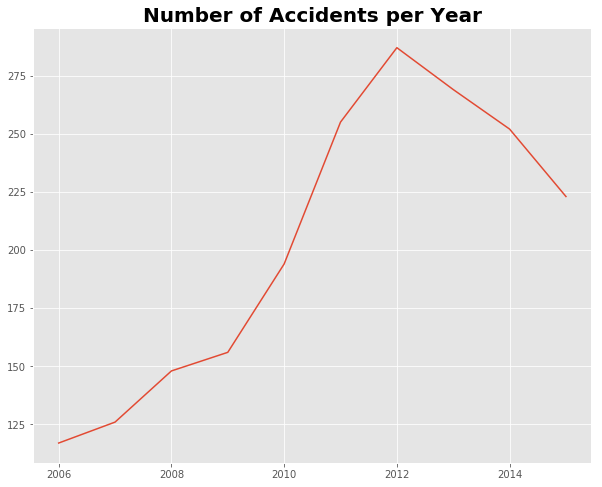

In [52]:
Year = data2['year'].value_counts().sort_index()
Year.plot(figsize=(10,8))
plt.title('Number of Accidents per Year', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Aircraft Type')

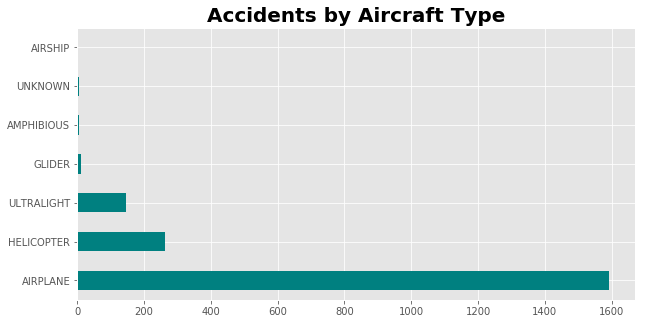

In [41]:
# graph of accidents by equipment type
equip = data['equipment'].value_counts()
equip = equip.sort_values(ascending=False)

equip.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Aircraft Type', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Engine Type')

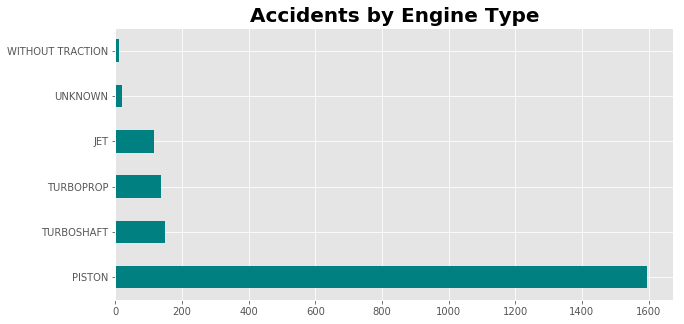

In [42]:
#engine type
engine = data['engine_type'].value_counts()
engine= engine.sort_values(ascending=False)

engine.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Engine Type', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Phase of Operation')

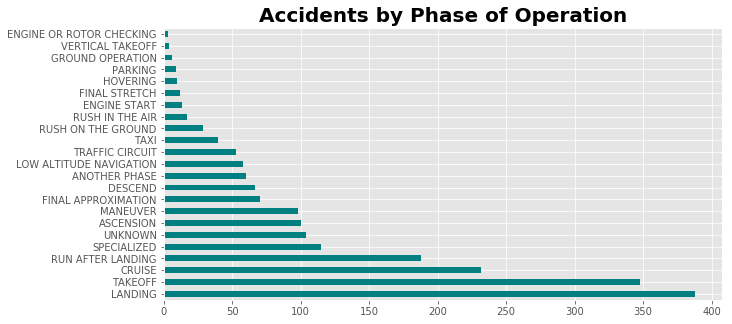

In [43]:
# operation phase

phase = data['operation_phase'].value_counts()
phase = phase.sort_values(ascending=False)

phase.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Phase of Operation', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Operation Type')

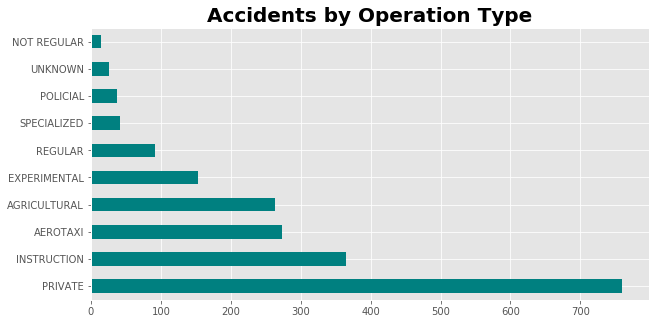

In [44]:
# type of operation

type_op = data['type_operation'].value_counts()
type_op = type_op.sort_values(ascending=False)

type_op.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Operation Type', fontsize=20, fontweight='bold')

In [57]:
# USE THIS IN THE VISUALIZATION SECTION - DON'T ELIMINATE DATA HERE
# MAKE A COPY OF THE DATASET


# select the manufacturers that have 10 or more occurrances

manufacturers = data['manufacturer'].value_counts()
data = data[data['manufacturer'].isin(manufacturers.index[manufacturers >=10]).values]

In [ ]:
seats = data['seatings_amount'].value_counts()
seats= seats.sort_values(ascending=False)

seats.plot.barh(color='teal', figsize=(15,10))
plt.title('Number of Seats on the Plane/Equipment', fontsize=20, fontweight='bold')

# Part III:  Build Machine Learning Models

### Preprocess the data

In [84]:
data.shape

(2024, 13)

In [85]:
data_by_damage = data.groupby('damage_level')  # group data by damage level
levels = list(data['damage_level'].unique())  # list of damage categories
print ('damage levels:',levels)

damage levels: ['SUBSTANTIAL', 'LIGHT', 'NONE', 'UNKNOWN', 'DESTROYED']


#### Replace the unknown values with the value of 'substantial' since statistically this is the most frequent value of damage (the mode)

In [86]:
data['damage_level'] = (data['damage_level'].replace('UNKNOWN', 'SUBSTANTIAL')).astype('str')

Stackoverflow:
In most cases getting rid of infinite and null values solve this problem.

get rid of infinite values.

df.replace([np.inf, -np.inf], np.nan, inplace=True)
get rid of null values the way you like, specific value such as 999, mean, or create your own function to impute missing values

df.fillna(999, inplace=True)
or

df.fillna(df.mean(), inplace=True)

In [87]:
data['damage_level'] = data['damage_level'].fillna('SUBSTANTIAL')

In [90]:
# Encode the labels for damage level - use LabelEncoder for target variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['damage_level'] = pd.DataFrame(le.fit_transform(data['damage_level']))

print(data.head(3))

# for more information see documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

  equipment                 manufacturer   model engine_type  engines_amount  \
0  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
1  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
2  AIRPLANE               BEECH AIRCRAFT  95-B55      PISTON               2   

   takeoff_max_weight (Lbs)  seatings_amount  year_manufacture  \
0                      1455                2              1962   
1                      1455                2              1960   
2                      5092                6              1966   

  registration_country registration_aviation    operation_phase  \
0               BRAZIL           INSTRUCTION            UNKNOWN   
1               BRAZIL           INSTRUCTION            TAKEOFF   
2               BRAZIL              AEROTAXI  RUN AFTER LANDING   

  type_operation  damage_level  
0    INSTRUCTION           3.0  
1    INSTRUCTION           1.0  
2       AEROTAXI           3.0  


In [91]:
np.isnan(data['damage_level']).sum()

3

In [92]:
# to see where the nan values are
np.where(np.isnan(data['damage_level']))

(array([2021, 2022, 2023]),)

## I.  Logistic Regression Model
### Process:

* Normalization
* Define X and y
* Train-Test Split
* Fit a Model
* Predict
* Generate a Confusion Matrix
* Calculate Evaluation Metrics

### Step 1:  Define X and y

#### First we have to create dummy variables for the features we are using before using them to define X and y

In [ ]:
x_feats = ['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']
X = pd.get_dummies(data[x_feats])

y = data['damage_level']

### Make sure all nan values are eliminated from the data

In [ ]:
np.isnan(X).sum()

In [ ]:
np.isnan(y).sum()

### Normalization is not needed for this dataset so we can proceed to the Train Test Split phase


### Step 2: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### Step 3:  Fit a Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

### Step 4: Predict

In [ ]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [ ]:
# residuals are the values between the actual y value and the predicted y value
# check the residuals for the train data

residuals = np.abs(y_train - y_hat_train)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

In [ ]:
# now check the residuals for the test data

residuals = np.abs(y_test - y_hat_test)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

### The classifier was 62.8% accurate with the training data and 63.2% with the test data

When the test data was categorized, 499 entries were correctly labeled. This represents about 63% of the test data.

With a confusion matrix, we can see which genres were more often correctly labeled, as well as those that were mislabeled the majority of the time.

### Step 6.  Generate a Confusion Matrix

"A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix."
geeksforgeeks.org/confusion-matrix-machine-learning/

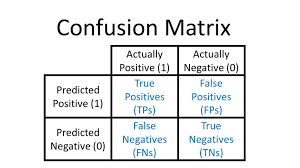

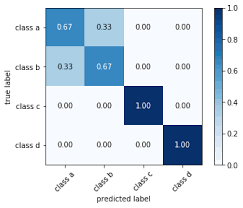

The results from the confusion matrix enable us to calculate different evaluation metrics for our classification problem. These metrics include precision, recall, accuracy, and the F-1 score.

For more of an explanation of a confusion matrix, visit:
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

See https://www.youtube.com/watch?v=8Oog7TXHvFY at 24:30 to learn about reading a confusion matrix for a multi-categorical classification model

In [ ]:
# generate a multi-categorical confusion matrix (code adapted from lab dsc-3-27-08)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat_test)
cm

# EDIT
The true labels run down the left side of the matrix, genres 0 thru 9
The predicted labels run across the top (or bottom) of the matrix.
The diagonal numbers of the matrix represents how many times the true value was predicted correctly.  As you can see, the model did only a fair job predicting the correct genre.  In the case of genre 3 (disco), it was classified 16 times as genre 7 (pop).  If we look at the reverse case, genre 7 was never classified as genre 3.  Let's take a look at this more visually.

In [ ]:
# visualize the confusion matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(15,10))  # added to change figure size
    plt.imshow(cf, cmap=plt.cm.OrRd)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(y_test, y_hat_test)

# EDIT
Ideally, the diagonal of this matrix would be shaded darker than the areas above or below it. This would mean that the true label was predicted correctly the majority of the time. Looking at the diagonal, we can see that ............. were correctly classified the most, whereas ................ were classified incorrectly the most.

### Calculate the Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print (classification_report(y_test,y_hat_test))

In [ ]:
print ('Accuracy Score:', accuracy_score(y_test, y_hat_test))

The F1-score penalizes models heavily if it skews too hard towards either precision or recall. For this reason, F1-score is generally the most used metric for describing the performance of a model.
However, because we are dealing with airplane accidents, it is more important that our model be accurate.

### Which Metric to Use?
The metrics that are most important to a project will often be dependent on the business use or goals for that model. 
In general, it is a good idea to calculate any and all relevant metrics. In most classification tasks, you don't know which model will perform best when you start. The common workflow is to train each different type of classifier, and select the best by comparing the performance of each. It's common to make tables like the one below, and highlight the best peformer for each metric:

![image.png](attachment:image.png)

The above taken from Mod3 Section27 Evaluation Metrics lesson

# EDIT
Overall, the logistical regresson model performed fair at best.  It did better with some genres than others but choosing a deep learning model should produce a better result.

### Using a Pipeline with Logistic Regression

Pipelines are extremely useful tools to write clean and manageable code for machine learning. Recall how we start preparing our data set: we want to clean our data, transform it, potentially use feature selection, and then run a machine learning algorithm. All of this can be done in one procedure using a pipeline.

In [94]:
# from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe_linreg = Pipeline([('pca', PCA(n_components=25, random_state=123)),
                 ('clf', LogisticRegression(random_state=123))])

# fit the pipeline
pipe_linreg.fit(X_train, y_train)

# print result
print (pipe_linreg.score(X_test, y_test))

### Let's explore some deep learning models to see if better performance can be achieved

## II.  Deep Learning Model

In [95]:
features = ['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']

print(features)
data[features].head()

['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']


,equipment,engine_type,registration_aviation,operation_phase,type_operation
0,AIRPLANE,PISTON,INSTRUCTION,UNKNOWN,INSTRUCTION
1,AIRPLANE,PISTON,INSTRUCTION,TAKEOFF,INSTRUCTION
2,AIRPLANE,PISTON,AEROTAXI,RUN AFTER LANDING,AEROTAXI
3,AIRPLANE,PISTON,PRIVATE,RUN AFTER LANDING,PRIVATE
4,AIRPLANE,JET,REGULAR,ASCENSION,REGULAR


In [96]:
features_data = pd.get_dummies(data[features])

In [97]:
features_data.head()

,equipment_AIRPLANE,equipment_AIRSHIP,equipment_AMPHIBIOUS,equipment_GLIDER,equipment_HELICOPTER,equipment_ULTRALIGHT,equipment_UNKNOWN,engine_type_JET,engine_type_PISTON,engine_type_TURBOPROP,...,type_operation_AEROTAXI,type_operation_AGRICULTURAL,type_operation_EXPERIMENTAL,type_operation_INSTRUCTION,type_operation_NOT REGULAR,type_operation_POLICIAL,type_operation_PRIVATE,type_operation_REGULAR,type_operation_SPECIALIZED,type_operation_UNKNOWN
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
type(features_data)

pandas.core.frame.DataFrame

In [99]:
data['damage_level'].head()

0    3.0
1    1.0
2    3.0
3    1.0
4    2.0
Name: damage_level, dtype: float64

In [100]:
# the following keras code is adapted from https://www.kaggle.com/chadwickcasper/deep-music

# Split the data into 10 different folds, each containing the whole set
# The folds contain two parts:
# index:0 the larger (9/10's) piece - (the features)
# index:1 the smaller (1/10's) piece - (the label)

from sklearn.model_selection import StratifiedKFold
import random

folds = 10
random_state = random_state = random.randint(1, 65536)
cv = StratifiedKFold(n_splits=folds,
                     shuffle=True,
                     random_state=random_state,
                     )

kfold_data = list(cv.split(features_data, data['damage_level']))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#  import keras libraries

from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
model = models.Sequential([
    layers.Dense(28, activation='relu'),
    layers.Dense(19, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
first_fold = kfold_data[0]
train_indices, test_indices = first_fold[0], first_fold[1]

train_data = features_data.iloc[train_indices]
train_labels = data['damage_level'].iloc[train_indices]

test_data = data.iloc[test_indices]
test_labels = data['damage_level'].iloc[test_indices]

In [ ]:
# Train the model
history = model.fit(train_data.values, train_labels.values, epochs=150)

## error here if it makes it this far : ValueError: could not convert string to float: 'AIRPLANE'

In [ ]:
# print the labels of the history contents:
print(history.history.keys())

# graph the results for the one fold model
# summarize history for accuracy
plt.plot(history.history['acc'], color = 'steelblue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color = 'm')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = norm_df.iloc[train_indices]
    train_labels = data['label'].iloc[train_indices]
    test_data = norm_df.iloc[test_indices]
    test_labels = data['label'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [ ]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# print the accuracy for the testing data

model.evaluate(test_data.values, test_labels.values)

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = norm_df.iloc[train_indices]
    train_labels = data['label'].iloc[train_indices]
    test_data = norm_df.iloc[test_indices]
    test_labels = data['label'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )

    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')

print(history.history.keys())
print('Test Accuracy = ', history.history['val_acc'])

In [ ]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = norm_df.iloc[train_indices]
    train_labels = data['label'].iloc[train_indices]
    test_data = norm_df.iloc[test_indices]
    test_labels = data['label'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=500,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [ ]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

In [ ]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

epochs = range(1, len(history.history['acc']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['acc'], 'orange', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'steelblue', label='Validation acc')
plt.title('Training & Validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'm', label='Validation loss')

plt.title('Training & Validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_hat = model.predict(X)
y_hat

In [ ]:
# final evaluation for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# final evaluation for the testing data
model.evaluate(test_data.values, test_labels.values)

## Conclusion:

# Work for Further Consideration